# K-Nearest Neighbors in Python

## 1 - Load Dataset

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np 
from tqdm import tqdm 

iris = load_iris()
X, y = iris.data[:, 2:], iris.target

In [2]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The next task is to divide the dataset into a training and a test set. Notice though that the first 10 entries are all zeros. This is because the dataset has not been shuffled yet. Hence, in Iris, the vector `y` will consists of 50 0's, 50 1's, and 50 2's (in that order).

It would thus be a bit problematic if we assigned the first 100 entries to a training set and the 50 last entries to the test set.



## 2 - Shuffle Dataset and Create Training and Test Subsets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)

In [4]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (105, 2)
y_train.shape: (105,)
X_test.shape: (45, 2)
y_test.shape: (45,)


## 3 - Plot Dataset

We are only working with 2 features, i.e., petal length and petal width (via `X, y = iris.data[:, 2:], iris.target` earlier). Create a scatter plot matrix of these 2 features for X_train

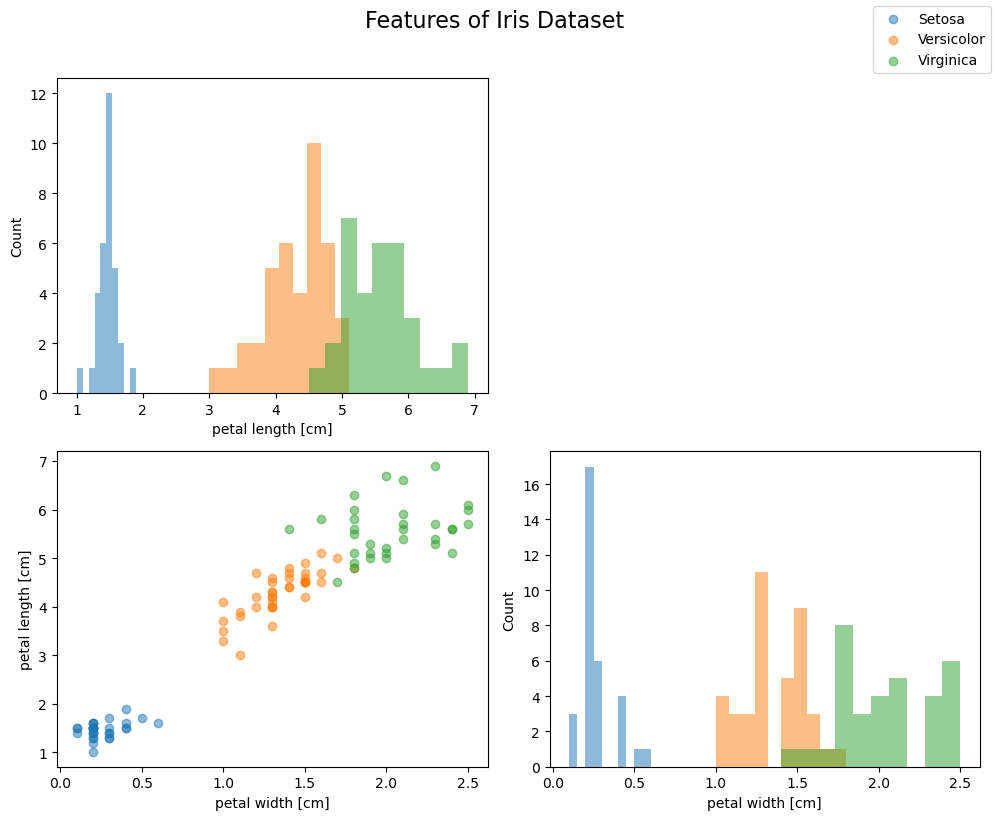

In [7]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix


names = ['petal length [cm]', 'petal width [cm]']

fig, axes = scatterplotmatrix(X_train[y_train==0], figsize=(10, 8), alpha=0.5, label="Setosa")
fig, axes = scatterplotmatrix(X_train[y_train==1], fig_axes=(fig, axes), alpha=0.5, label="Versicolor")
fig, axes = scatterplotmatrix(X_train[y_train==2], fig_axes=(fig, axes), alpha=0.5, names=names, label="Virginica")

fig.legend()

plt.suptitle("Features of Iris Dataset", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## 4 - Fit k-Nearest Neighbor Model

Next, we are going to use the `KNeighborsClassifier` class from scikit-learn and instantiate a new KNN object, which we call `knn_model`. Then, we "fit" this model the training dataset:

In [8]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Q: What distance measure is used by default?

In [9]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

- The distance measure by default is `minkowski`

## 5 - Use kNN Model to Make Predictions

After "fitting" the KNN model, we can now make predictions on new data points that the model has not seen before. The test set represents such data points. Of course, we have labels for the test set as well, but we only use these labels to evaluate the model -- i.e., we compare the predictions to the true labels in the test set in order to find out how good the model is:

In [10]:
y_pred = knn_model.predict(X_test)

In [14]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100

print(f'Train set accuracy: {((knn_model.predict(X_train) == y_train).sum() / y_train.shape[0]) * 100: .2f}%')

print(f'Test set accuracy: {accuracy:.2f}%')

Train set accuracy:  99.05%
Test set accuracy: 93.33%


In [15]:
# print('Test set accuracy: %.2f%%' % (knn_model.score(X_test, y_test)*100))

print(f'Test set accuracy: {knn_model.score(X_test, y_test)*100:.2f}%')

Test set accuracy: 93.33%
Test set accuracy: 93.33%


Q1: Change K to maximize the performance on the test set

Q2: Change the distance measure and analyse the model performance

In [44]:
res = []

metrics = ['p', 'hamming', 'euclidean', 'l2', 'chebyshev', 'sokalsneath',
           'nan_euclidean', 'sqeuclidean', 'cosine', 'l1', 'russellrao', 'braycurtis', 'infinity', 
           'canberra', 'rogerstanimoto', 'minkowski', 'yule', 'cityblock', 'jaccard', 
           'correlation', 'dice', 'haversine', 'sokalmichener', 'manhattan'
            ]

ks = np.arange(1, 20, 1)

for metric in tqdm(metrics):
    # print(f'Processing metric: {metric}')
    for n in ks:
        knn_model = KNeighborsClassifier(n_neighbors=n, metric=metric)
        knn_model.fit(X_train, y_train)
        res.append({'metric': metric, 'k': n, 'accuracy': knn_model.score(X_test, y_test)})
        

  0%|          | 0/24 [00:00<?, ?it/s]

 67%|██████▋   | 16/24 [00:08<00:03,  2.30it/s]c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)
c:\

In [45]:
pd.DataFrame(res).sort_values(by='accuracy', ascending=False).head(10)

,metric,k,accuracy
405,haversine,7,0.977778
237,infinity,10,0.955556
297,minkowski,13,0.955556
296,minkowski,12,0.955556
295,minkowski,11,0.955556
294,minkowski,10,0.955556
293,minkowski,9,0.955556
292,minkowski,8,0.955556
291,minkowski,7,0.955556
289,minkowski,5,0.955556


In [46]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=7, metric='haversine')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='haversine', n_neighbors=7)

## 6 - Visualize Decision Boundary

Usually, in machine learning, we work with datasets that have more then 2 feature variables. For educational purposes, however, we chose a very simple dataset consisting of only two features here (the petal length and the petal width of Iris flowers). If we have only two features, we can easily visualize the decision boundary of the model -- here, we will be using a convenience function implemented in the MLxtend library:

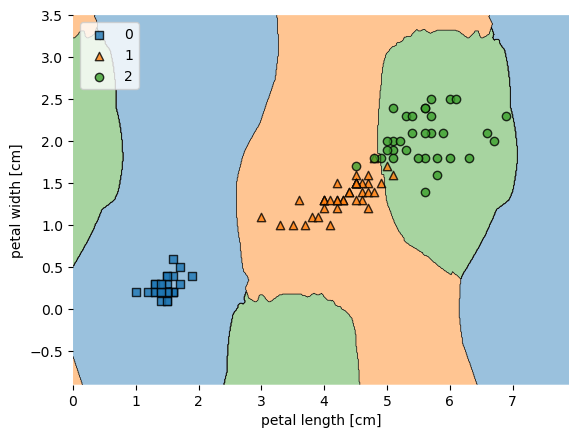

In [47]:
from mlxtend.plotting import plot_decision_regions


plot_decision_regions(X_train, y_train, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

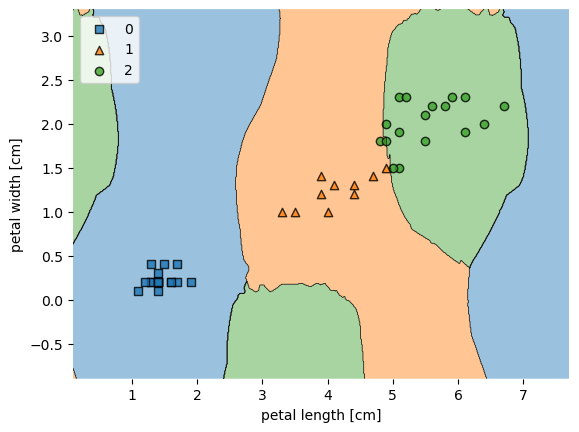

In [48]:
plot_decision_regions(X_test, y_test, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()